In [1]:
pip install -U scikit-fuzzy

     |████████████████████████████████| 993 kB 31.8 MB/s            
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894069 sha256=e1649468b97a20a9366bc4cd5dece5c661575b74e606746ec0113e2d87612ed4
  Stored in directory: /home/ec2-user/.cache/pip/wheels/31/1e/58/db8cfe08f81c72d8c31bc58690ce63d9e3d93a6e97dca5ddb4
Successfully built scikit-fuzzy
Note: you may need to restart the kernel to use updated packages.


In [2]:
import boto3
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from skfuzzy.cluster import cmeans
from sklearn.metrics import silhouette_score

## Defining the bucket 
s3 = boto3.resource('s3')
bucket_name = 'data-445'
bucket = s3.Bucket(bucket_name)

## Defining the csv file 
file_key = 'Fall_2021/In_Class_Assignments/customers.csv'

bucket_object = bucket.Object(file_key)
file_object = bucket_object.get()
file_content_stream = file_object.get('Body')

## Reading the csv file
customers = pd.read_csv(file_content_stream)
customers.head()

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/boto3/compat.py:88: PythonDeprecationWarning: Boto3 will no longer support Python 3.6 starting May 30, 2022. To continue receiving service updates, bug fixes, and security updates please upgrade to Python 3.7 or later. More information can be found here: https://aws.amazon.com/blogs/developer/python-support-policy-updates-for-aws-sdks-and-tools/
  warnings.warn(warning, PythonDeprecationWarning)


,ID,Visit_Time,Average_Expense,Sex,Age
0,1,3,5.7,0,10
1,2,5,14.5,0,27
2,3,16,33.5,0,32
3,4,5,15.9,0,30
4,5,16,24.9,0,23


In [3]:
## Dropping ID
customers = customers.drop(columns = 'ID', axis = 1)
customers.head()

,Visit_Time,Average_Expense,Sex,Age
0,3,5.7,0,10
1,5,14.5,0,27
2,16,33.5,0,32
3,5,15.9,0,30
4,16,24.9,0,23


In [4]:
# Scaling 
scaler = MinMaxScaler()

customers[['Visit_Time_0_1', 'Average_Expense_0_1', 'Sex_0_1', 'Age_0_1']] = scaler.fit_transform(customers)
customers.head(10)

,Visit_Time,Average_Expense,Sex,Age,Visit_Time_0_1,Average_Expense_0_1,Sex_0_1,Age_0_1
0,3,5.7,0,10,0.117647,0.041096,0.0,0.051282
1,5,14.5,0,27,0.235294,0.342466,0.0,0.487179
2,16,33.5,0,32,0.882353,0.993151,0.0,0.615385
3,5,15.9,0,30,0.235294,0.390411,0.0,0.564103
4,16,24.9,0,23,0.882353,0.698630,0.0,0.384615
5,3,12.0,0,15,0.117647,0.256849,0.0,0.179487
6,12,28.5,0,33,0.647059,0.821918,0.0,0.641026
7,14,18.8,0,27,0.764706,0.489726,0.0,0.487179
8,6,23.8,0,16,0.294118,0.660959,0.0,0.205128
9,3,5.3,0,11,0.117647,0.027397,0.0,0.076923


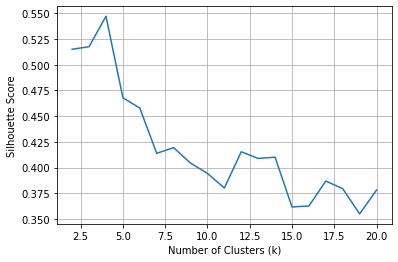

In [5]:
## Defining a list to store silhoutte scores
silhouette = list()

for i in range(2, 21):
    
    ## Clustering the data into i clusters
    kmeans_md = KMeans(n_clusters = i, n_init = 20).fit(customers[['Visit_Time_0_1', 'Average_Expense_0_1', 'Sex_0_1', 'Age_0_1']])
    kmeans_md_labels = kmeans_md.labels_
    
    ## Computing the silhouette score
    score = silhouette_score(customers[['Visit_Time_0_1', 'Average_Expense_0_1', 'Sex_0_1', 'Age_0_1']], kmeans_md_labels)
    silhouette.append(score)
    
## Visualizing the results 
import matplotlib.pyplot as plt

plt.plot(range(2, 21), silhouette)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show();

In [6]:
X = customers[['Visit_Time_0_1', 'Average_Expense_0_1', 'Sex_0_1', 'Age_0_1']]

## Runnig Fuzzy C-means with 4 clusters
fc, W, u0, d, jm, p, pc = cmeans(X.T, c = 4, m = 1.25, error = 1e-6, maxiter = 1000)

In [11]:
W[3]

array([6.31011294e-06, 7.85104438e-06, 6.61744459e-05, 8.69868792e-05,
       8.18636990e-08, 7.90149676e-09, 9.27550958e-06, 6.69309756e-06,
       1.84907281e-04, 5.96184993e-06, 1.15925252e-07, 4.09311109e-07,
       9.27550958e-06, 2.51650549e-07, 3.82032144e-06, 8.22970291e-06,
       9.87485636e-08, 2.19918732e-06, 1.41320935e-05, 9.95286041e-01,
       2.07872294e-07, 9.94249541e-01, 1.30047842e-05, 9.97647232e-01,
       9.99994350e-01, 2.12348779e-05, 3.01669015e-07, 9.99936867e-01,
       5.50327939e-10, 1.88251892e-04, 1.28661474e-03, 9.99999837e-01,
       9.99999259e-01, 9.99707582e-01, 1.88251892e-04, 2.30237134e-07,
       9.99827860e-01, 1.05459738e-04, 6.36469104e-08, 2.07872294e-07,
       1.85976607e-05, 2.88635342e-04, 3.50186665e-06, 3.92806343e-02,
       9.99980175e-01, 9.99936867e-01, 2.30733102e-01, 1.00671505e-05,
       1.30802757e-03, 9.97647232e-01, 1.93846174e-05, 9.88770919e-01,
       9.99814921e-01, 7.94349622e-04, 3.85581462e-01, 3.16330551e-06,
      

In [12]:
## Creating the cluster column
customers['cluster'] = np.nan

## Changing likelihoods to labels
customers['cluster'] = np.where(W[0] > 0.7, 1, customers['cluster'])
customers['cluster'] = np.where(W[1] > 0.7, 2, customers['cluster'])
customers['cluster'] = np.where(W[2] > 0.7, 3, customers['cluster'])
customers['cluster'] = np.where(W[3] > 0.7, 4, customers['cluster'])

In [13]:
## Cluster 1
cluster_1 = customers[customers['cluster'] == 1].reset_index(drop = True)
cluster_1.describe()

,Visit_Time,Average_Expense,Sex,Age,Visit_Time_0_1,Average_Expense_0_1,Sex_0_1,Age_0_1,cluster
count,24.000000,24.000000,24.0,24.000000,24.000000,24.000000,24.0,24.000000,24.0
mean,5.416667,10.591667,1.0,15.291667,0.259804,0.208619,1.0,0.186966,1.0
std,2.430185,4.474752,0.0,4.666990,0.142952,0.153245,0.0,0.119666,0.0
min,1.000000,4.500000,1.0,8.000000,0.000000,0.000000,1.0,0.000000,1.0
25%,3.000000,7.875000,1.0,11.750000,0.117647,0.115582,1.0,0.096154,1.0
50%,6.000000,10.900000,1.0,16.000000,0.294118,0.219178,1.0,0.205128,1.0
75%,7.000000,12.000000,1.0,17.500000,0.352941,0.256849,1.0,0.243590,1.0
max,10.000000,23.800000,1.0,23.000000,0.529412,0.660959,1.0,0.384615,1.0


In [14]:
## Cluster 2
cluster_2 = customers[customers['cluster'] == 2].reset_index(drop = True)
cluster_2.describe()

,Visit_Time,Average_Expense,Sex,Age,Visit_Time_0_1,Average_Expense_0_1,Sex_0_1,Age_0_1,cluster
count,8.000000,8.000000,8.0,8.000000,8.000000,8.000000,8.0,8.000000,8.0
mean,14.375000,25.587500,0.0,26.625000,0.786765,0.722175,0.0,0.477564,2.0
std,1.846812,4.647714,0.0,5.629958,0.108636,0.159168,0.0,0.144358,0.0
min,12.000000,18.800000,0.0,18.000000,0.647059,0.489726,0.0,0.256410,2.0
25%,13.500000,22.950000,0.0,22.750000,0.735294,0.631849,0.0,0.378205,2.0
50%,14.000000,25.400000,0.0,26.000000,0.764706,0.715753,0.0,0.461538,2.0
75%,16.000000,28.500000,0.0,32.250000,0.882353,0.821918,0.0,0.621795,2.0
max,17.000000,33.500000,0.0,33.000000,0.941176,0.993151,0.0,0.641026,2.0


In [15]:
## Cluster 3
cluster_3 = customers[customers['cluster'] == 3].reset_index(drop = True)
cluster_3.describe()

,Visit_Time,Average_Expense,Sex,Age,Visit_Time_0_1,Average_Expense_0_1,Sex_0_1,Age_0_1,cluster
count,11.000000,11.000000,11.0,11.00000,11.000000,11.000000,11.0,11.000000,11.0
mean,4.909091,12.709091,0.0,17.00000,0.229947,0.281133,0.0,0.230769,3.0
std,1.700267,6.060108,0.0,6.78233,0.100016,0.207538,0.0,0.173906,0.0
min,3.000000,4.600000,0.0,9.00000,0.117647,0.003425,0.0,0.025641,3.0
25%,3.500000,7.150000,0.0,12.00000,0.147059,0.090753,0.0,0.102564,3.0
50%,5.000000,14.500000,0.0,16.00000,0.235294,0.342466,0.0,0.205128,3.0
75%,6.000000,16.000000,0.0,20.00000,0.294118,0.393836,0.0,0.307692,3.0
max,8.000000,23.800000,0.0,30.00000,0.411765,0.660959,0.0,0.564103,3.0


In [16]:
## Cluster 4
cluster_4 = customers[customers['cluster'] == 4].reset_index(drop = True)
cluster_4.describe()

,Visit_Time,Average_Expense,Sex,Age,Visit_Time_0_1,Average_Expense_0_1,Sex_0_1,Age_0_1,cluster
count,16.000000,16.000000,16.0,16.000000,16.000000,16.000000,16.0,16.000000,16.0
mean,12.250000,25.362500,1.0,31.187500,0.661765,0.714469,1.0,0.594551,4.0
std,2.955221,4.336339,0.0,8.336416,0.173837,0.148505,0.0,0.213754,0.0
min,8.000000,17.800000,1.0,17.000000,0.411765,0.455479,1.0,0.230769,4.0
25%,10.000000,21.100000,1.0,26.000000,0.529412,0.568493,1.0,0.461538,4.0
50%,12.000000,25.450000,1.0,28.500000,0.647059,0.717466,1.0,0.525641,4.0
75%,13.250000,28.275000,1.0,36.750000,0.720588,0.814212,1.0,0.737179,4.0
max,18.000000,33.700000,1.0,47.000000,1.000000,1.000000,1.0,1.000000,4.0
